In [1]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

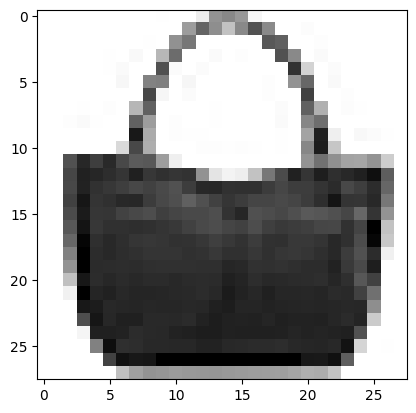

so:  8


In [6]:
n = 100
import matplotlib.pyplot as plt
digit = x_train[n]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so: ',y_train[n])

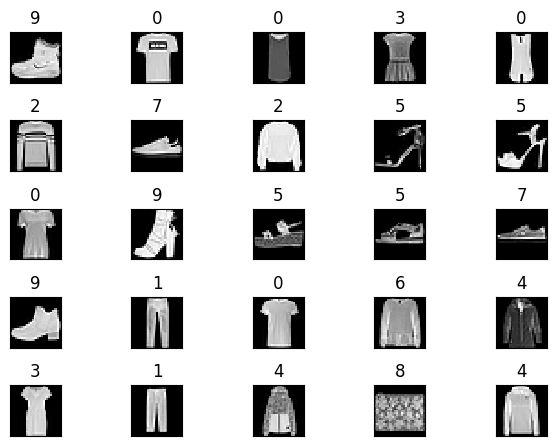

In [7]:
import matplotlib.pyplot as plt
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray',interpolation='none')
  plt.title(format(y_train[i]))
  plt.xticks([ ])
  plt.yticks([ ])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
X=x_test
Y=y_test

In [10]:
X.shape

(10000, 28, 28)

In [11]:
Y.shape

(10000,)

In [12]:
x_train=x_train.reshape(60000,28*28)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28*28)
x_test=x_test.astype('float32')/255

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_test.shape

(10000, 784)

In [15]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [16]:
y_train.shape

(60000, 10)

In [17]:
y_test.shape

(10000, 10)

In [18]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Mat mat: ',test_loss)
print('Do chinh xac: ',test_acc)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.5495 - accuracy: 0.8031
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3866 - accuracy: 0.8592
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3396 - accuracy: 0.8756
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3128 - accuracy: 0.8843
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2964 - accuracy: 0.8910
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2788 - accuracy: 0.8964
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2669 - accuracy: 0.9001
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2548 - accuracy: 0.9057
Epoch 9/10
469/469 [==============================] - 5s 12ms/step - loss: 0.2439 - accuracy: 0.9089
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy

In [19]:
model.save('fashion_mnist.h5')

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
from keras.models import load_model
model10=load_model('fashion_mnist.h5')

In [86]:
from keras.utils import load_img
from keras.utils import img_to_array

img = load_img('/content/sneaker_shoe.jpg')
img = img.convert('P')
img = img.resize((28, 28))

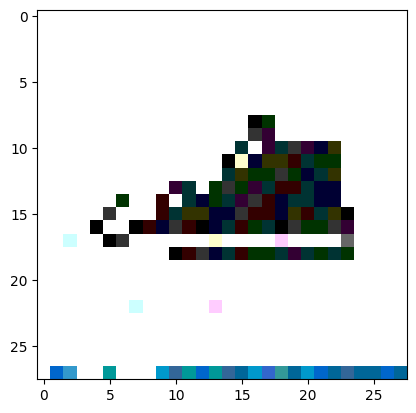

In [87]:
plt.imshow(img)

In [88]:
import numpy as np
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32')/255
np.argmax(model.predict(img),axis=-1)

1/1 [==============================] - 0s 20ms/step


array([8])